In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
import numpy as np
import math
import glob
from collections import Counter
from collections import defaultdict

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.options.display.float_format = '{:,.1f}'.format
sns.set()

In [2]:
def effective_reach(x, R, a = 4.08577, b = 3.08577):
    return (2 / a) * (np.arctan(a * (x / R) - b) - np.arctan(-b))

def cutoff(x, R):
    return min(x, R) / R

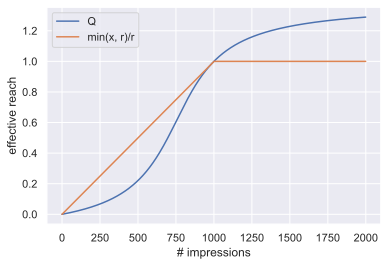

In [3]:
R = 1000
plt.plot(np.arange(2000), [effective_reach(x, R) for x in range(2000)], label="Q")
plt.plot(np.arange(2000), [cutoff(x, R) for x in range(2000)], label="min(x, r)/r")
plt.legend()
plt.xlabel("# impressions")
plt.ylabel("effective reach")
plt.savefig("reach.pdf")

In [4]:
def tidy(df):
    tidy_data = pd.melt(
        df, 
        id_vars= [
            'name',
        ], 
        value_vars = [
            'profit',
            'budget',
#             'reach',
            'cost',
#             'revenue'
        ],
        value_name='stat',
        var_name='stat_type'
    )
    return tidy_data

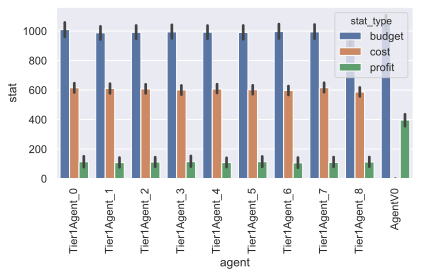

In [5]:
df = pd.read_csv("1_day_1_campaign_Q.csv")
df = tidy(df)
ax = sns.barplot(x="name", y="stat", data=df, hue="stat_type", hue_order=["budget", "cost", "profit"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("agent")
plt.savefig("1d1c_Q.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()

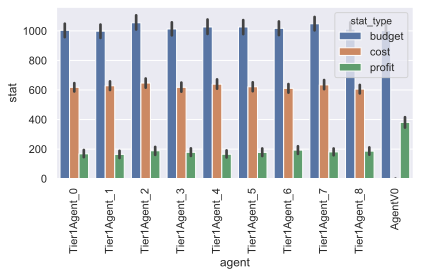

In [6]:
df = pd.read_csv("1_day_1_campaign_min.csv")
df = tidy(df)
ax = sns.barplot(x="name", y="stat", data=df, hue="stat_type", hue_order=["budget", "cost", "profit"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel("agent")
plt.savefig("1d1c_min.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()

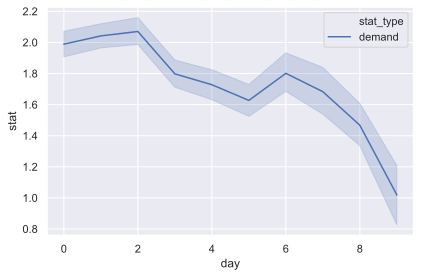

In [20]:
df = pd.read_csv("bid.csv")
tidy_data = pd.melt(
    df, 
    id_vars= [
        'day',
    ], 
    value_vars = [
        'demand',
        'price',
        'max_bid',
    ],
    value_name='stat',
    var_name='stat_type'
)
ax = sns.lineplot(x="day", y="stat", data=tidy_data, hue="stat_type", hue_order=["demand"])
plt.xlabel("day")
plt.tight_layout()
plt.savefig("demand.pdf", bbox_inches='tight')
plt.show()